## An example of the Wigner function for a two-mode quantum state.

In [2]:
import matplotlib.pyplot as plt

from wigner import wigner
from utils import *

In [3]:
cutoff = 10

In [4]:
def plot_probability(rho):
    plt.figure(figsize=(6, 6))
    plt.imshow(prob_distr(rho)[:8, :8], cmap='PuBu', origin='lower')
    plt.colorbar(fraction=0.046)
    plt.title(r'$P_{n_{1}, n_{2}}$', fontsize=18)
    plt.xlabel(r'$n_{1}$', fontsize=18)
    plt.ylabel(r'$n_{2}$', fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.show()

    
def plot_wigner(wfun, grd=80, a=6):
    xvec = np.linspace(-a, a, grd)
    dx = np.abs(xvec[1] - xvec[0])

    # Integration over two variables and normalisation.
    wred_1 = np.sum(wfun,  axis=(0, 1))
    wred_1 = wred_1 / np.sqrt(dx**2 * np.sum(np.power(np.abs(wred_1), 2)))
    wred_2 = np.sum(wfun,  axis=(2, 3))
    wred_2 = wred_2 / np.sqrt(dx**2 * np.sum(np.power(np.abs(wred_2), 2)))
    wred_3 = np.sum(wfun,  axis=(0, 2))
    wred_3 = wred_3 / np.sqrt(dx**2 * np.sum(np.power(np.abs(wred_3), 2)))
    wred_4 = np.sum(wfun,  axis=(1, 3))
    wred_4 = wred_4 / np.sqrt(dx**2 * np.sum(np.power(np.abs(wred_4), 2)))
    
    xmin, xmax = xvec[20], xvec[-(20+1)]
    
    fig = plt.figure(figsize=(11, 9))
    plt.subplot(221)
    plt.title(r'$\int W(X_{1}, P_{1}, X_{2}, P_{2}) d X_{1} d P_{1} $', fontsize=15)
    plt.imshow(wred_1, cmap="jet", interpolation='gaussian', extent=[xmin, xmax, xmin, xmax], aspect='equal')
    plt.xlabel(r'$X_{2}$', fontsize=15)
    plt.ylabel(r'$P_{2}$', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.colorbar()
    plt.subplot(222)
    plt.title(r'$\int W(X_{1}, P_{1}, X_{2}, P_{2}) d X_{2} d P_{2} $', fontsize=15)
    plt.imshow(wred_2, cmap="jet", interpolation='gaussian', extent=[xmin, xmax, xmin, xmax], aspect='equal')
    plt.xlabel(r'$X_{1}$', fontsize=15)
    plt.ylabel(r'$P_{1}$', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.colorbar()
    plt.subplot(223)
    plt.title(r'$\int W(X_{1}, P_{1}, X_{2}, P_{2}) d X_{1} d X_{2} $', fontsize=15)
    plt.imshow(wred_3, cmap="jet", interpolation='gaussian', extent=[xmin, xmax, xmin, xmax], aspect='equal')
    plt.xlabel(r'$P_{1}$', fontsize=15)
    plt.ylabel(r'$P_{2}$', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.colorbar()
    plt.subplot(224)
    plt.title(r'$\int W(X_{1}, P_{1}, X_{2}, P_{2}) d P_{1} d P_{2} $', fontsize=15)
    plt.imshow(wred_4, cmap="jet", interpolation='gaussian', extent=[xmin, xmax, xmin, xmax], aspect='equal')
    plt.xlabel(r'$X_{1}$', fontsize=15)
    plt.ylabel(r'$X_{2}$', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.colorbar()
    plt.tight_layout() 
    plt.show()

    

##  Examples:

##  1) Two mode squeezed vacuum state: \\( | TMSV \rangle = \sqrt{1 - |z|^2} \sum_{n=0}^{\infty} z^n |n\rangle_{1}|n\rangle_{2} \\)

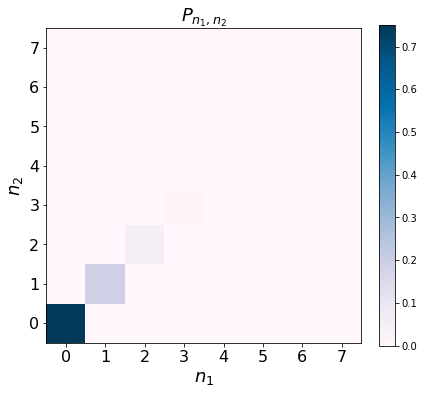

In [5]:
tmsv = tmsv_state(l=cutoff, z=0.5)
rho_tmsv = np.einsum('kl,mn->klmn', tmsv, np.conj(tmsv))

plot_probability(rho_tmsv)

In [6]:
# Wigner function.
wfun_tmsv = wigner(rho_tmsv, grd=80, a=6)

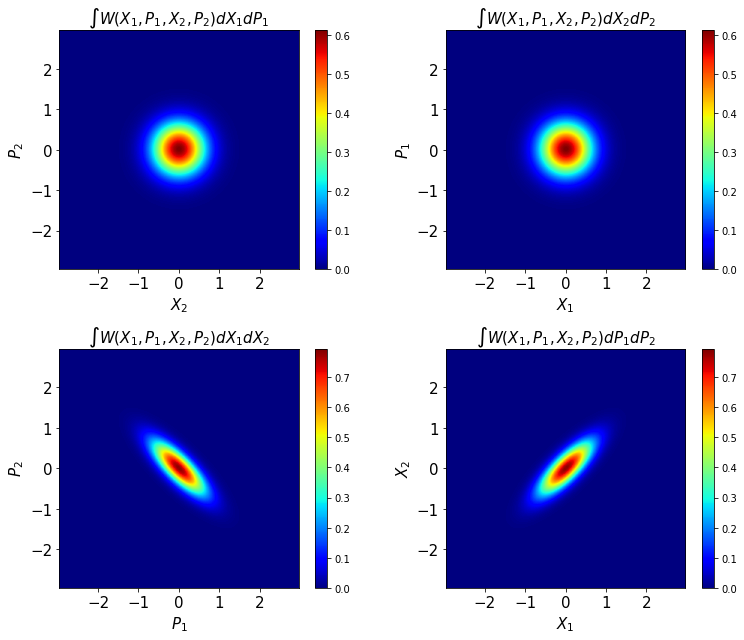

In [7]:
plot_wigner(wfun_tmsv, grd=80, a=6)

## 2) Coherent and fock states:  \\(|\psi \rangle = |\alpha\rangle_{1}\otimes|1\rangle_{2} \\)

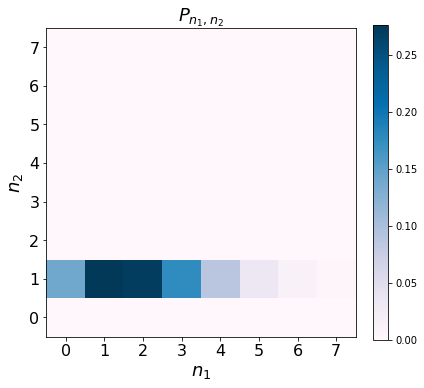

In [8]:
s1 = np.zeros([cutoff])
s1[1] = 1
s2 = coherent_state(l=cutoff, alpha=1.4)

st = np.tensordot(s1, s2, axes=0)
rho = np.einsum('kl,mn->klmn', st, np.conj(st))

plot_probability(rho)

In [9]:
wfun = wigner(rho, grd=80, a=6)

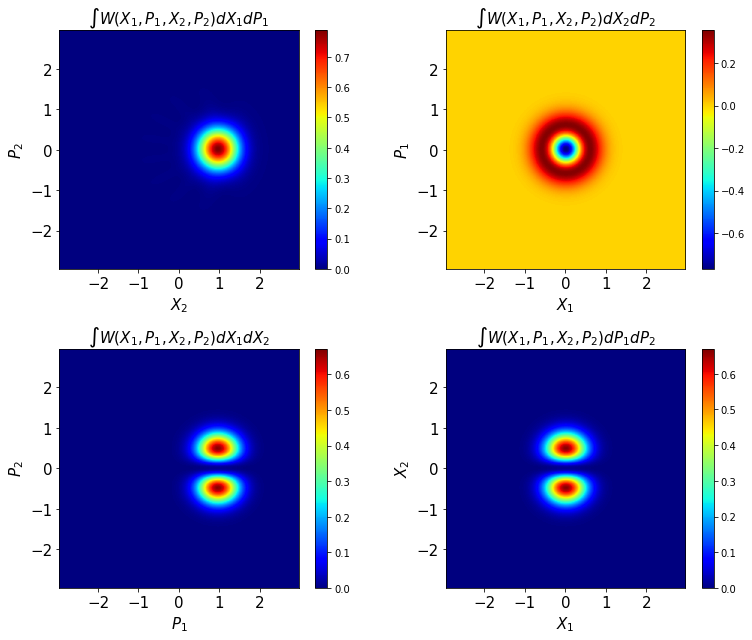

In [10]:
plot_wigner(wfun, grd=80, a=6)